# how much water with sigma-t >= 26.5 crosses your outer and your inner boundaries on its way to the Jordan River line?


In [1]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dates = np.array([dt.datetime(2016,10,1)+relativedelta(months=i) for i in range(18)])

### outer boundary first

In [3]:
dataS17 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')
dataW16 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
dataW17 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

In [4]:
meander = 0
init = 1
North = 2
Sshelf = 5
Sslope = 4
offshore = 3
sections = [North, Sshelf, Sslope, offshore]
sec_name = ['north', 'south\nshelf', 'south\nslope', 'offshore']

In [5]:
# summer day split
monS = ['apr17', 'may17', 'jun17', 'jul17', 'aug17', 'sep17']
mon_len = [30, 31, 30, 31, 31, 30]
h = 3601
sum_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
sum_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

# winter day split
mon16 = ['oct16', 'nov16', 'dec16', 'jan17', 'feb17', 'mar17']
mon17 = ['oct17', 'nov17', 'dec17', 'jan18', 'feb18', 'mar18']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [6]:
# density looks like its already in terms of sigma-t not kg/m3
# calc the total total transport >= 26.5
oct16 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[0]) & (dataW16.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov16 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[1]) & (dataW16.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec16 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[2]) & (dataW16.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan17 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[3]) & (dataW16.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb17 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[4]) & (dataW16.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar17 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[5]) & (dataW16.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

apr17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[0]) & (dataS17.init_t <= sum_end[0])])/(sum_end[0]-sum_start[0]+1) for sec in sections]
may17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[1]) & (dataS17.init_t <= sum_end[1])])/(sum_end[1]-sum_start[1]+1) for sec in sections]
jun17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[2]) & (dataS17.init_t <= sum_end[2])])/(sum_end[2]-sum_start[2]+1) for sec in sections]
jul17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[3]) & (dataS17.init_t <= sum_end[3])])/(sum_end[3]-sum_start[3]+1) for sec in sections]
aug17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[4]) & (dataS17.init_t <= sum_end[4])])/(sum_end[4]-sum_start[4]+1) for sec in sections]
sep17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[5]) & (dataS17.init_t <= sum_end[5])])/(sum_end[5]-sum_start[5]+1) for sec in sections]

oct17 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[0]) & (dataW17.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov17 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[1]) & (dataW17.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec17 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[2]) & (dataW17.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan18 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[3]) & (dataW17.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb18 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[4]) & (dataW17.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar18 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[5]) & (dataW17.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

In [7]:
# get the actual total transport to we can get a proportion of flow
oct16total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[0]) & (dataW16.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1)
nov16total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[1]) & (dataW16.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1)
dec16total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[2]) & (dataW16.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1)
jan17total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[3]) & (dataW16.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1)
feb17total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[4]) & (dataW16.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1)
mar17total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[5]) & (dataW16.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1)

apr17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[0]) & (dataS17.init_t <= sum_end[0])])/(sum_end[0]-sum_start[0]+1)
may17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[1]) & (dataS17.init_t <= sum_end[1])])/(sum_end[1]-sum_start[1]+1)
jun17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[2]) & (dataS17.init_t <= sum_end[2])])/(sum_end[2]-sum_start[2]+1)
jul17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[3]) & (dataS17.init_t <= sum_end[3])])/(sum_end[3]-sum_start[3]+1)
aug17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[4]) & (dataS17.init_t <= sum_end[4])])/(sum_end[4]-sum_start[4]+1)
sep17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[5]) & (dataS17.init_t <= sum_end[5])])/(sum_end[5]-sum_start[5]+1)

oct17total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[0]) & (dataW17.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1)
nov17total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[1]) & (dataW17.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1)
dec17total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[2]) & (dataW17.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1)
jan18total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[3]) & (dataW17.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1)
feb18total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[4]) & (dataW17.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1)
mar18total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[5]) & (dataW17.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1)

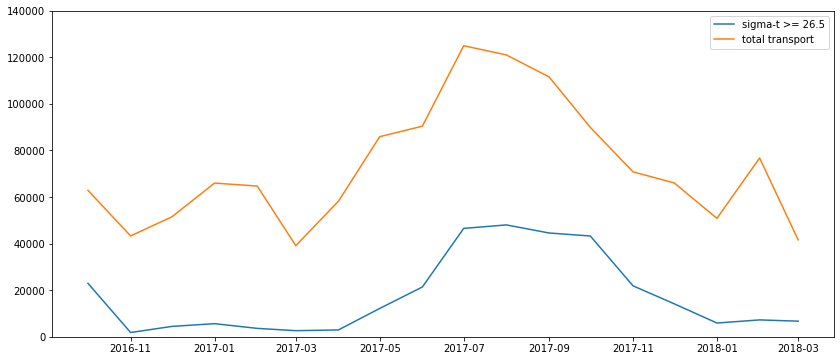

In [8]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.plot(dates, [sum(oct16), sum(nov16), sum(dec16), sum(jan17), sum(feb17), sum(mar17),sum(apr17), sum(may17), sum(jun17), sum(jul17), sum(aug17), sum(sep17),sum(oct17), sum(nov17), sum(dec17), sum(jan18), sum(feb18), sum(mar18)], label='sigma-t >= 26.5')
ax.plot(dates, [oct16total, nov16total, dec16total, jan17total, feb17total, mar17total,apr17total, may17total, jun17total, jul17total, aug17total, sep17total,oct17total, nov17total, dec17total, jan18total, feb18total, mar18total], label='total transport')
ax.legend()
ax.set_ylim([0,140000]);


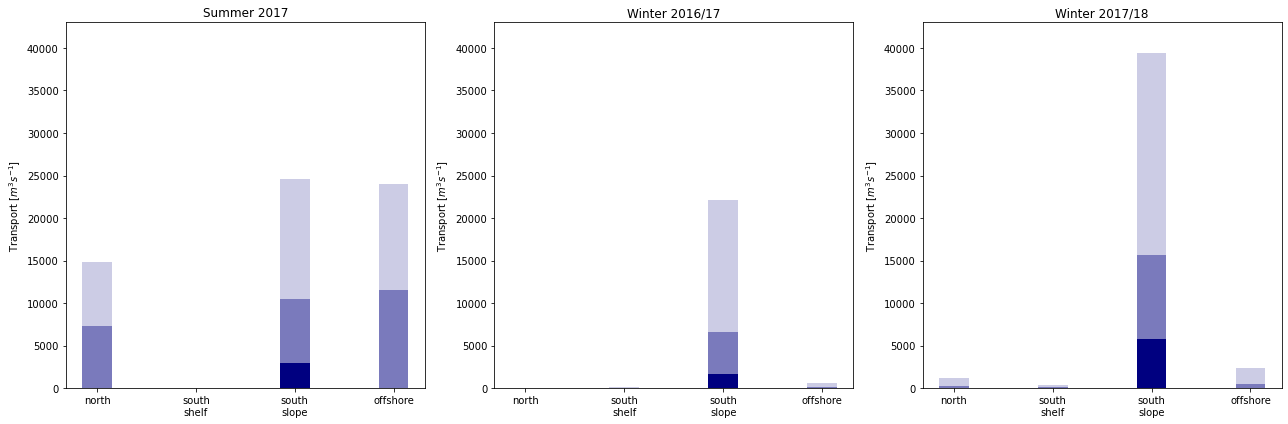

In [9]:
# histogram of which boundaries this dense water is coming from

fig, ax = plt.subplots(1,3, figsize=(18,6))

y = [apr17, may17, jun17, jul17, aug17, sep17]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[0].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[0].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[0].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[0].set_title('Summer 2017')
ax[0].set_ylim([0,43000])
ax[0].set_ylabel('Transport [$m^{3}s^{-1}$]')

y = [oct16, nov16, dec16, jan17, feb17, mar17]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[1].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[1].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[1].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[1].set_title('Winter 2016/17')
ax[1].set_ylim([0,43000])
ax[1].set_ylabel('Transport [$m^{3}s^{-1}$]')

y = [oct17, nov17, dec17, jan18, feb18, mar18]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[2].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[2].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[2].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[2].set_title('Winter 2017/18')
ax[2].set_ylabel('Transport [$m^{3}s^{-1}$]')
ax[2].set_ylim([0,43000])
plt.tight_layout()

### and eddy boundary

In [10]:
dataS17 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_30sep17/ariane_positions_quantitative.nc')
dataW16 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_31mar17/ariane_positions_quantitative.nc')
dataW17 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_31mar18/ariane_positions_quantitative.nc')

In [11]:
meander = 0
init = 1
eddy = 3
canyon = 4
south = 2
sections = [eddy, canyon, south]
sec_name = ['eddy', 'canyon', 'south']

In [12]:
oct16 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[0]) & (dataW16.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov16 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[1]) & (dataW16.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec16 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[2]) & (dataW16.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan17 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[3]) & (dataW16.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb17 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[4]) & (dataW16.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar17 = [np.sum(dataW16.final_transp[(dataW16.final_section==sec) & (dataW16.final_dens >= 26.5) & (dataW16.init_t >= win_start[5]) & (dataW16.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

apr17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[0]) & (dataS17.init_t <= sum_end[0])])/(sum_end[0]-sum_start[0]+1) for sec in sections]
may17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[1]) & (dataS17.init_t <= sum_end[1])])/(sum_end[1]-sum_start[1]+1) for sec in sections]
jun17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[2]) & (dataS17.init_t <= sum_end[2])])/(sum_end[2]-sum_start[2]+1) for sec in sections]
jul17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[3]) & (dataS17.init_t <= sum_end[3])])/(sum_end[3]-sum_start[3]+1) for sec in sections]
aug17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[4]) & (dataS17.init_t <= sum_end[4])])/(sum_end[4]-sum_start[4]+1) for sec in sections]
sep17 = [np.sum(dataS17.final_transp[(dataS17.final_section==sec) & (dataS17.final_dens >= 26.5) & (dataS17.init_t >= sum_start[5]) & (dataS17.init_t <= sum_end[5])])/(sum_end[5]-sum_start[5]+1) for sec in sections]

oct17 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[0]) & (dataW17.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov17 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[1]) & (dataW17.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec17 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[2]) & (dataW17.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan18 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[3]) & (dataW17.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb18 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[4]) & (dataW17.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar18 = [np.sum(dataW17.final_transp[(dataW17.final_section==sec) & (dataW17.final_dens >= 26.5) & (dataW17.init_t >= win_start[5]) & (dataW17.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

In [13]:
# get the actual total transport to we can get a proportion of flow
oct16total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[0]) & (dataW16.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1)
nov16total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[1]) & (dataW16.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1)
dec16total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[2]) & (dataW16.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1)
jan17total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[3]) & (dataW16.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1)
feb17total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[4]) & (dataW16.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1)
mar17total = np.sum(dataW16.final_transp[(dataW16.final_section != 0) & (dataW16.init_t >= win_start[5]) & (dataW16.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1)

apr17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[0]) & (dataS17.init_t <= sum_end[0])])/(sum_end[0]-sum_start[0]+1)
may17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[1]) & (dataS17.init_t <= sum_end[1])])/(sum_end[1]-sum_start[1]+1)
jun17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[2]) & (dataS17.init_t <= sum_end[2])])/(sum_end[2]-sum_start[2]+1)
jul17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[3]) & (dataS17.init_t <= sum_end[3])])/(sum_end[3]-sum_start[3]+1)
aug17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[4]) & (dataS17.init_t <= sum_end[4])])/(sum_end[4]-sum_start[4]+1)
sep17total = np.sum(dataS17.final_transp[(dataS17.final_section != 0) & (dataS17.init_t >= sum_start[5]) & (dataS17.init_t <= sum_end[5])])/(sum_end[5]-sum_start[5]+1)

oct17total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[0]) & (dataW17.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1)
nov17total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[1]) & (dataW17.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1)
dec17total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[2]) & (dataW17.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1)
jan18total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[3]) & (dataW17.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1)
feb18total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[4]) & (dataW17.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1)
mar18total = np.sum(dataW17.final_transp[(dataW17.final_section != 0) & (dataW17.init_t >= win_start[5]) & (dataW17.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1)

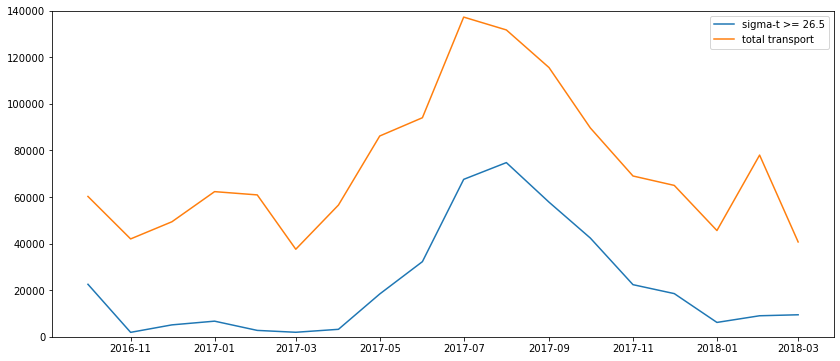

In [14]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.plot(dates, [sum(oct16), sum(nov16), sum(dec16), sum(jan17), sum(feb17), sum(mar17),sum(apr17), sum(may17), sum(jun17), sum(jul17), sum(aug17), sum(sep17),sum(oct17), sum(nov17), sum(dec17), sum(jan18), sum(feb18), sum(mar18)], label='sigma-t >= 26.5')
ax.plot(dates, [oct16total, nov16total, dec16total, jan17total, feb17total, mar17total,apr17total, may17total, jun17total, jul17total, aug17total, sep17total,oct17total, nov17total, dec17total, jan18total, feb18total, mar18total], label='total transport')
ax.legend()
ax.set_ylim([0,140000]);

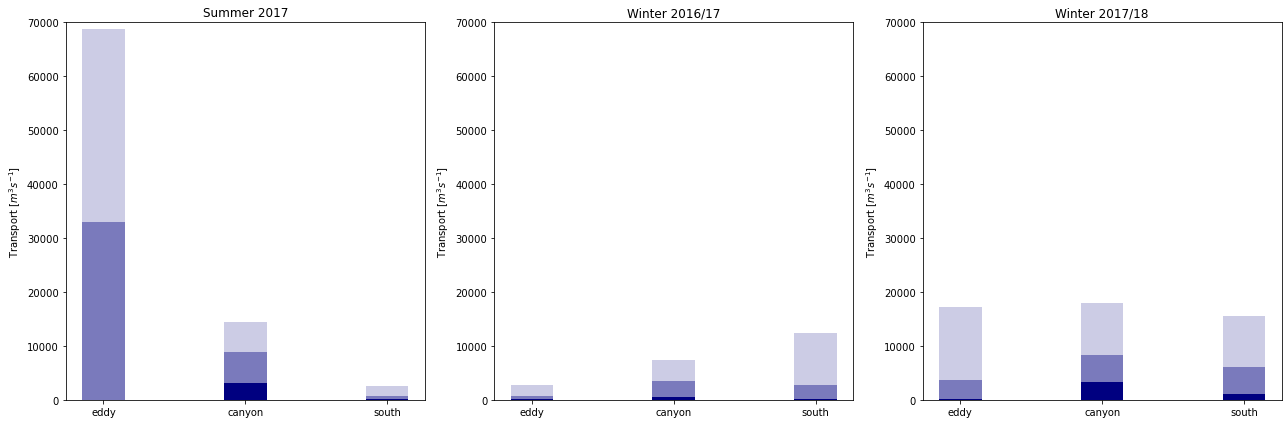

In [15]:
# histogram of which boundaries this dense water is coming from

fig, ax = plt.subplots(1,3, figsize=(18,6))

y = [apr17, may17, jun17, jul17, aug17, sep17]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[0].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[0].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[0].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[0].set_title('Summer 2017')
ax[0].set_ylim([0,70000])
ax[0].set_ylabel('Transport [$m^{3}s^{-1}$]')

y = [oct16, nov16, dec16, jan17, feb17, mar17]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[1].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[1].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[1].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[1].set_title('Winter 2016/17')
ax[1].set_ylim([0,70000])
ax[1].set_ylabel('Transport [$m^{3}s^{-1}$]')

y = [oct17, nov17, dec17, jan18, feb18, mar18]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[2].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[2].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[2].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[2].set_title('Winter 2017/18')
ax[2].set_ylabel('Transport [$m^{3}s^{-1}$]')
ax[2].set_ylim([0,70000])
plt.tight_layout()